# Засоби підготовки та аналізу даних
### ФБ-22 Загородній Ярослав
##### Лабораторна робота №5

#### 1. Отриману гармоніку з накладеним на неї шумом відфільтруйте за допомогою фільтру на ваш вибір (наприклад scipy.signal.iirfilter, повний список за посиланням: https://docs.scipy.org/doc/scipy/reference/signal.html). Відфільтрована гармоніка має бути максимально близька до «чистої»

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gammatone
from ipywidgets import interactive, FloatSlider, Checkbox, VBox

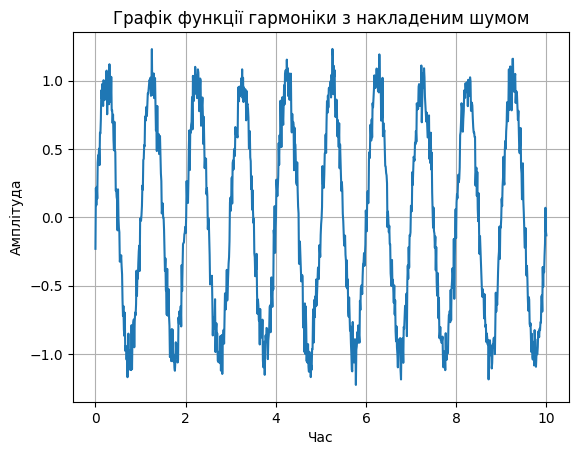

In [5]:
# Функція гармоніки з шумом
def harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_std):
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    noise = np.random.normal(noise_mean, noise_std, len(t))
    return signal + noise

# Запитуємо введення параметрів від користувача
amplitude = 1.0
frequency = 1.0
phase = 0.0
noise_mean = 0.0
noise_std = 0.1

# Генеруємо часові значення
t = np.linspace(0, 10, 1000)

# Обчислюємо значення функції гармоніки з шумом
y = harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_std)

# Малюємо графік
plt.plot(t, y)
plt.title('Графік функції гармоніки з накладеним шумом')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()


#### Відобразіть відфільтровану «чисту» гармоніку поряд з початковою

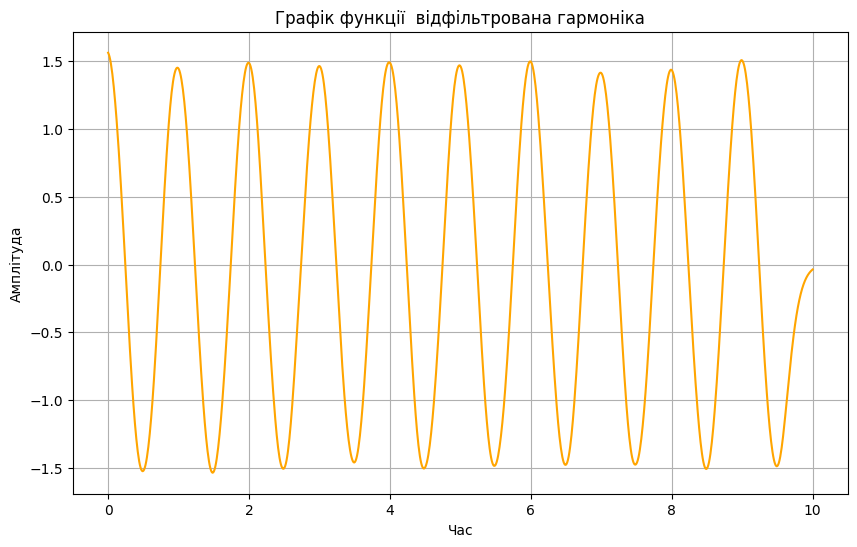

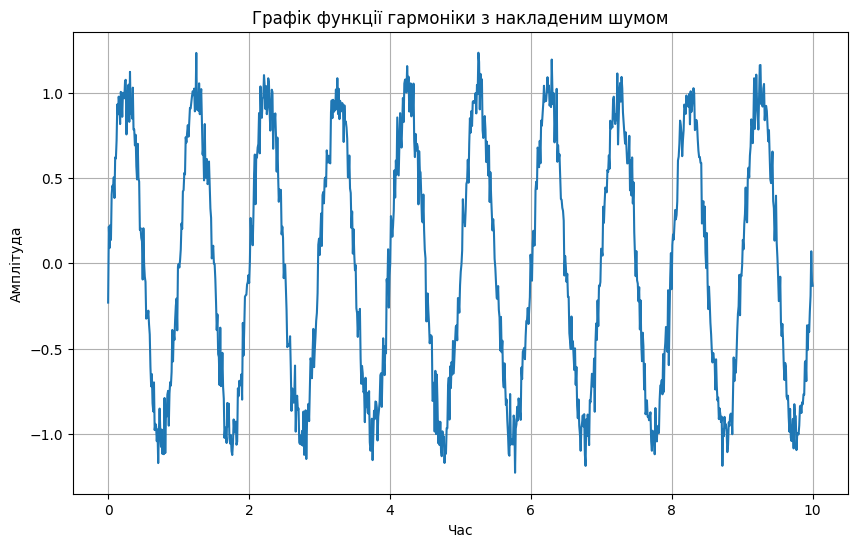

In [6]:

# Функція для фільтрації сигналу за допомогою gammatone
def filter_signal(signal, frequency, fs):
    # Параметри фільтра gammatone
    order = 4
    numtaps = 101
    
    # Генерація коефіцієнтів фільтра
    b, a = gammatone(frequency, ftype='fir', order=order, numtaps=numtaps, fs=fs)
    
    # Фільтрація сигналу
    filtered_signal = np.convolve(signal, b, mode='same')
    return filtered_signal



# Фільтруємо сигнал
fs = 1000  # Частота дискретизації
filtered_signal = filter_signal(y, frequency, fs)

# Малюємо графік
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal, color = 'orange')
plt.title('Графік функції  відфільтрована гармоніка')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Графік функції гармоніки з накладеним шумом')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.show()


#### Додайте відповідні інтерактивні елементи (чекбокс показу, параметри фільтру тощо) та оновіть існуючі: відфільтрована гармоніка має оновлюватись разом з початковою.

In [7]:
# Функція для побудови графіка
def plot_harmonic_with_noise(amplitude, frequency, phase, noise_mean, noise_std, show_filtered):
    t = np.linspace(0, 10, 1000)
    y = harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_std)
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label='Початкова гармоніка з шумом')
    plt.title('Графік функції гармоніки з накладеним шумом')
    plt.xlabel('Час')
    plt.ylabel('Амплітуда')
    plt.legend()
    plt.grid(True)
    
    if show_filtered:
        fs = 1000  # Частота дискретизації
        filtered_signal = filter_signal(y, frequency, fs)
        plt.figure(figsize=(10, 6))
        plt.plot(t, filtered_signal, label='Відфільтрована гармоніка', color = 'orange')
        plt.title('Графік відфільтрованої гармоніки')
        plt.xlabel('Час')
        plt.ylabel('Амплітуда')
        plt.legend()
        plt.grid(True)
    
    plt.show()

# Створення інтерактивних віджетів
amplitude_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Амплітуда:')
frequency_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Частота:')
phase_slider = FloatSlider(min=0, max=2*np.pi, step=0.1, value=0, description='Фаза:')
noise_mean_slider = FloatSlider(min=-1.0, max=1.0, step=0.1, value=0.0, description='Середнє значення шуму:')
noise_std_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=0.1, description='Стандартне відхилення шуму:')
show_filtered_checkbox = Checkbox(value=False, description='Показати відфільтровану гармоніку')

# Створення інтерактивного віджету
interactive_plot = interactive(plot_harmonic_with_noise,
                               amplitude=amplitude_slider,
                               frequency=frequency_slider,
                               phase=phase_slider,
                               noise_mean=noise_mean_slider,
                               noise_std=noise_std_slider,
                               show_filtered=show_filtered_checkbox)

# Відображення віджету
VBox([interactive_plot])